In [ ]:
# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plotting Heatmaps and Hierarchical Clustering

### Key Takeaways:
By the end of the class, you should be able to:

- Interpret a heatmap
    - Color coding
    - Cluster dendrogram
- Generate dendrograms
- Generate heatmaps


In [17]:
# Start with importing the packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline

In [3]:
# Now to import some data to work with:
df_log2 = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/df_log2.csv', index_col=0)
dfT = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/df_T.csv', index_col=0)
df_group = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/df_group.csv', index_col=0)

print (df_log2.head(),df_log2.shape)
print (dfT.head(),dfT.shape)
print (df_group.head(),df_group.shape)

                  FM_1       FM_2       FM_3  SK_MEL_28_1  SK_MEL_28_2  \
gene_symbol                                                              
ANKIB1       11.332037  11.247928  11.013323    11.363040    11.660887   
ZNF618       10.540128  10.492855  10.088788     9.961450    10.087463   
IMPG2         3.700440   3.169925   3.906891     2.000000     1.000000   
SLC26A6      10.112440   9.575539  10.558421     9.816984    10.142107   
MAPKAPK3     10.664447  10.799282  10.487840     9.903882     9.995767   

             SK_MEL_28_3  SK_MEL_147_1  SK_MEL_147_2  SK_MEL_147_3  UACC_62_1  \
gene_symbol                                                                     
ANKIB1         11.624795     11.212496     10.897845     11.182394  11.510764   
ZNF618          9.957102     10.927037     10.570804     10.659104  10.130571   
IMPG2           2.584963      4.169925      3.807355      3.700440   4.643856   
SLC26A6         9.936638      9.768184     10.029287      9.824959  10.45635

## Correlation Heatmaps

As we showed in the previous class, one way of doing a sanity check on the quality of expression data is to do a  scatter plots to look for concordance of expression between replicate pairs. One way of doing this in `seaborn` is with the `pairplot` function:

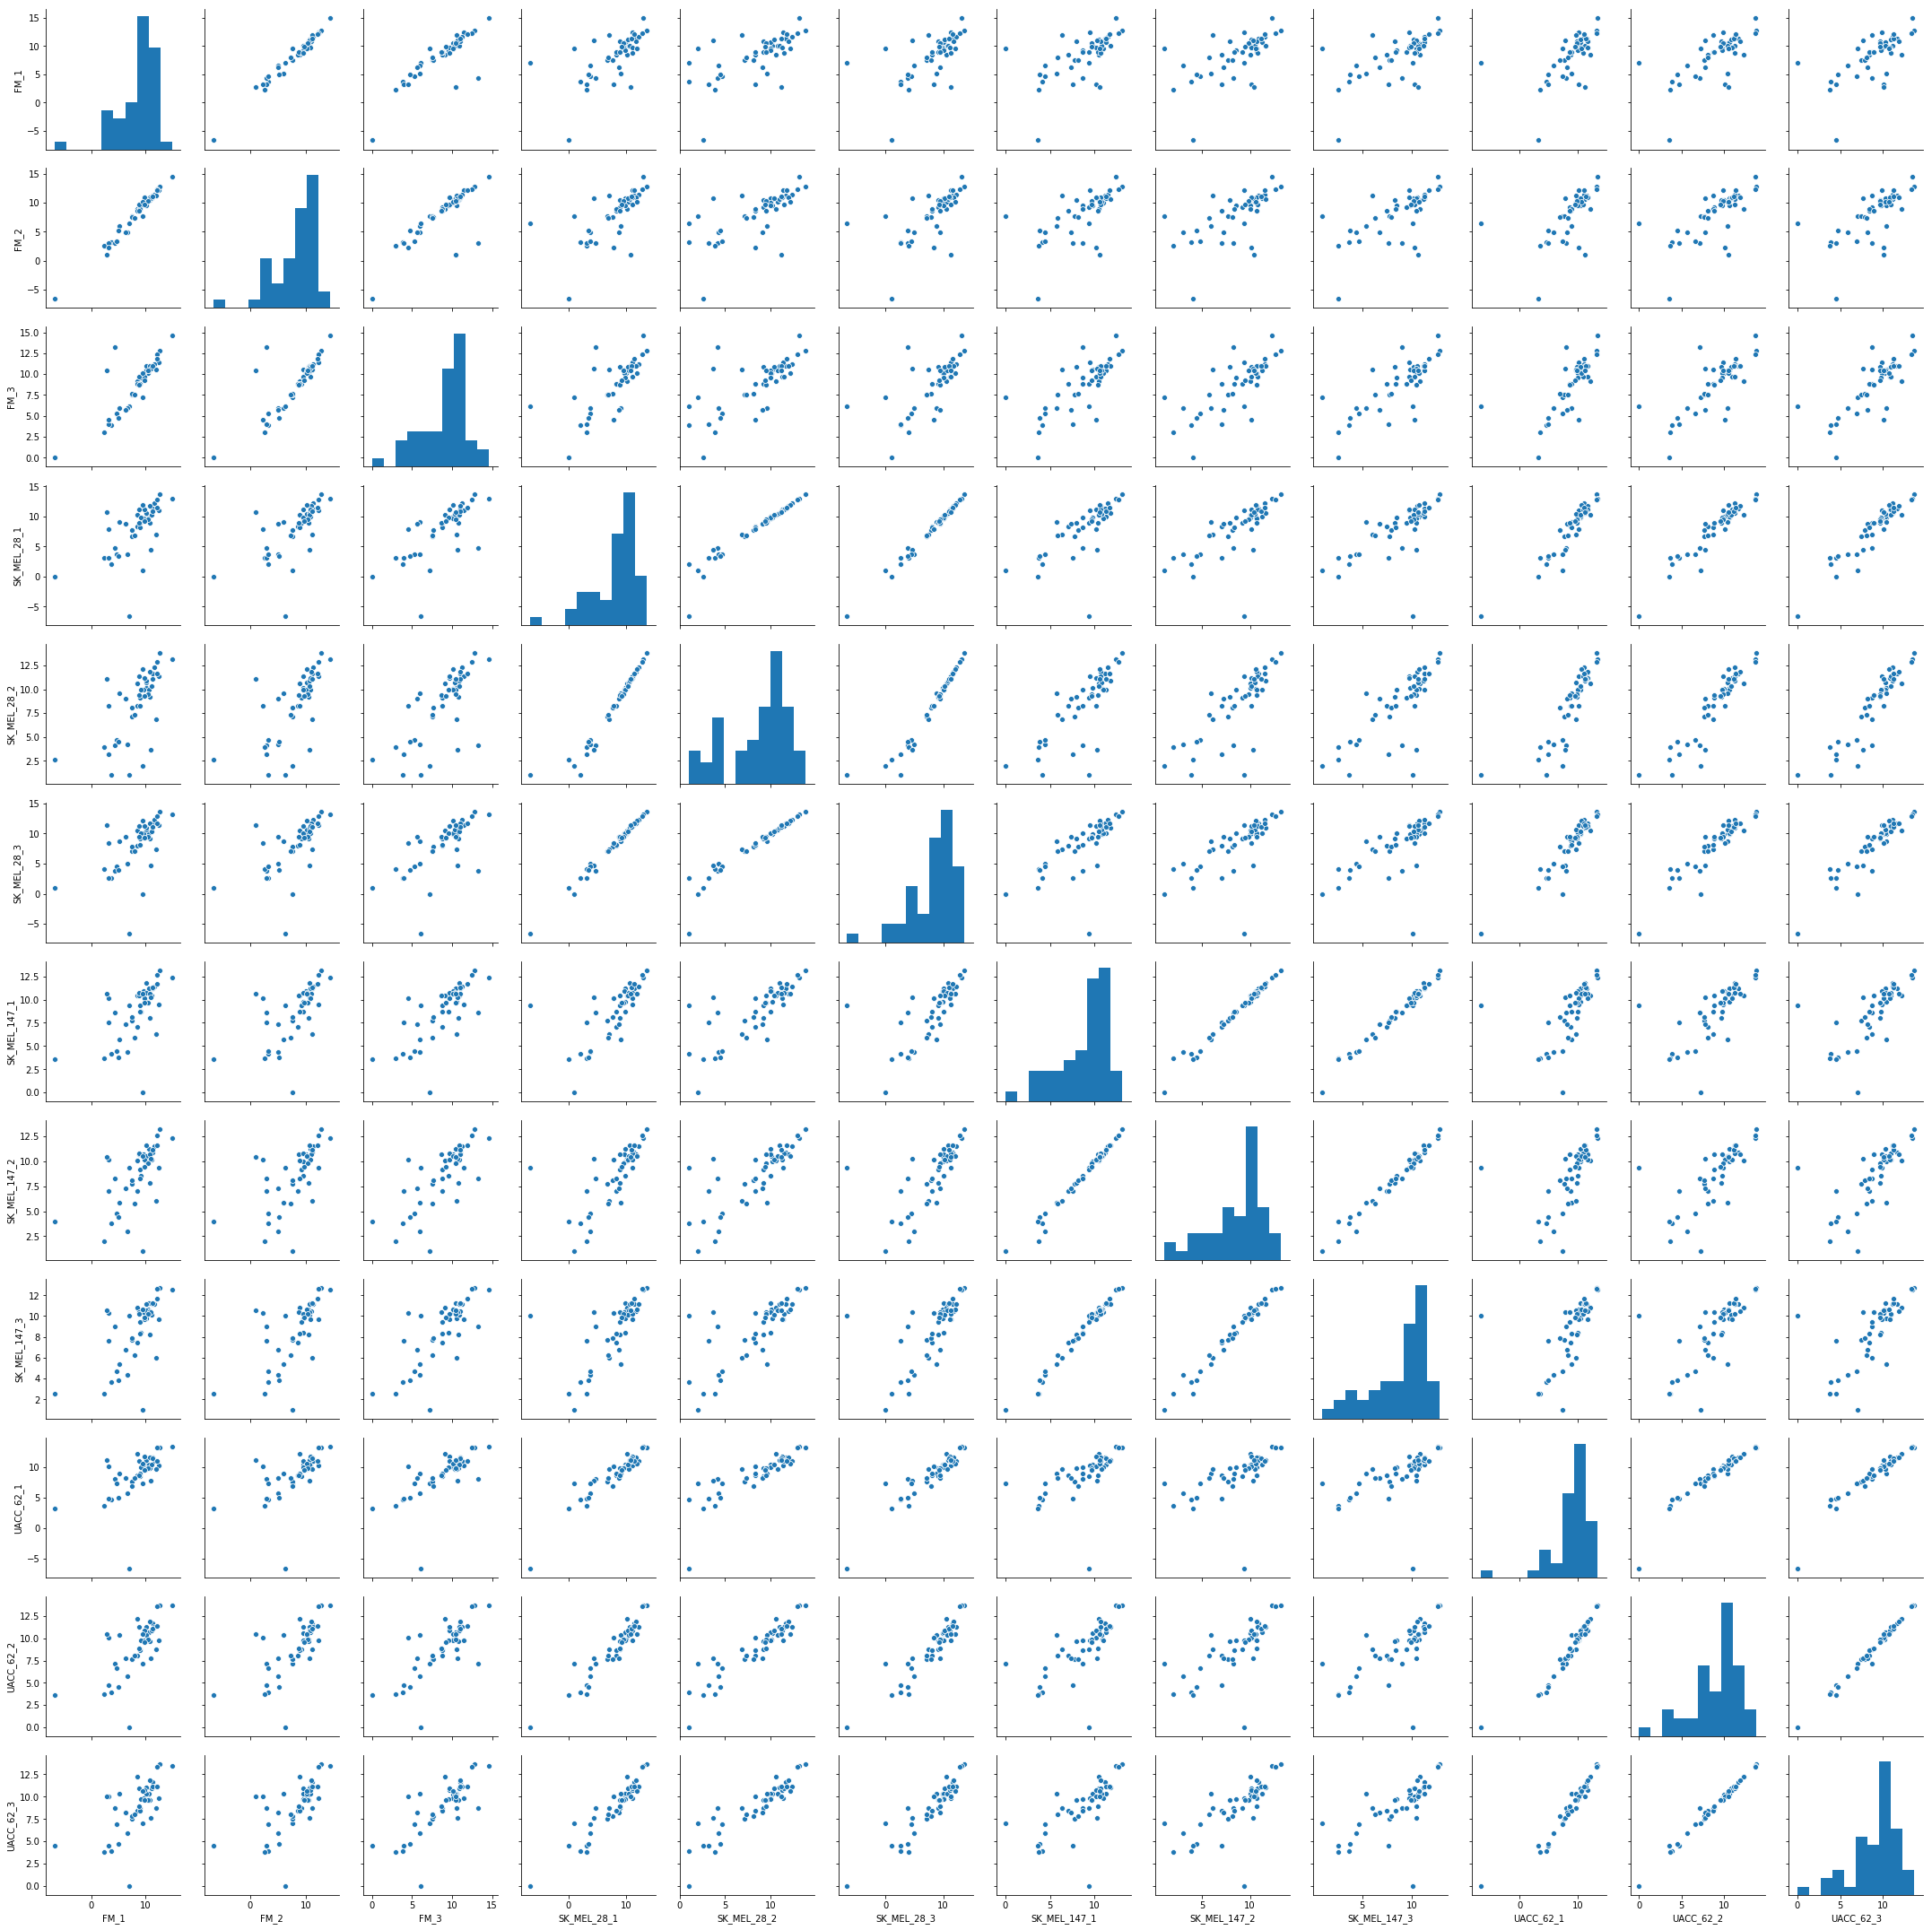

In [22]:
# Pairwise scatter plots for every combination of variables
sns.pairplot(df_log2)
plt.show()

The `pairplot function` can get unwieldy and hard to interpret when there are many samples under consideration. An alternate approach is to calculate pairwise correlation values, and plot using a heatmap.

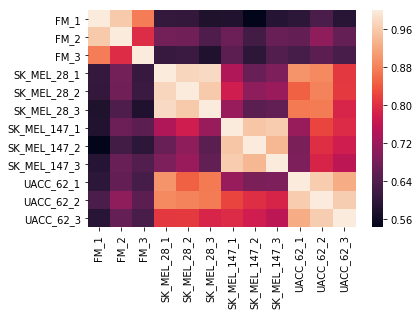

In [4]:
# Compute the correlation matrix
corr = df_log2.corr()

# The default heatmap
sns.heatmap(corr)
plt.show()

### Heatmap Customizations

In [5]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

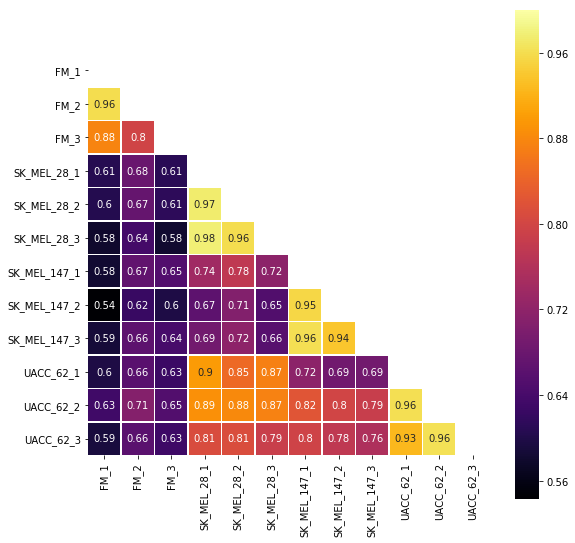

In [7]:
# Generate an annotated correlation heatmap
fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(corr, mask=mask,square=True,cmap = 'inferno',annot=True,linewidths=0.5)
plt.show()

## Clustermaps

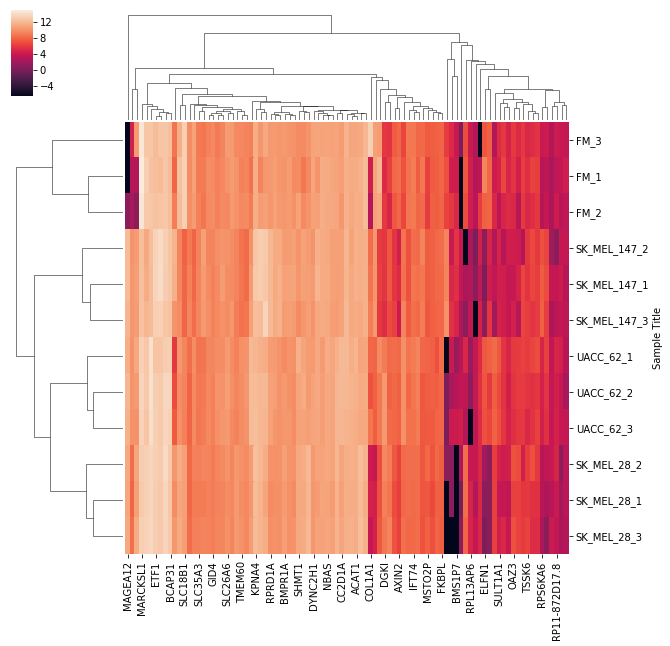

In [9]:
# The Default clustermap
g = sns.clustermap(dfT.loc[:,'ANKIB1':])

### Clustermap customizations

In [12]:
cell_line = dfT.loc[:,'CellLine']
cellColor = dict(zip(dfT.loc[:,'CellLine'].unique(),sns.color_palette()))
row_colors = cell_line.map(cellColor)
print(row_colors)

Sample Title
FM_1            (0.12156862745098039, 0.4666666666666667, 0.70...
FM_2            (0.12156862745098039, 0.4666666666666667, 0.70...
FM_3            (0.12156862745098039, 0.4666666666666667, 0.70...
SK_MEL_28_1       (1.0, 0.4980392156862745, 0.054901960784313725)
SK_MEL_28_2       (1.0, 0.4980392156862745, 0.054901960784313725)
SK_MEL_28_3       (1.0, 0.4980392156862745, 0.054901960784313725)
SK_MEL_147_1    (0.17254901960784313, 0.6274509803921569, 0.17...
SK_MEL_147_2    (0.17254901960784313, 0.6274509803921569, 0.17...
SK_MEL_147_3    (0.17254901960784313, 0.6274509803921569, 0.17...
UACC_62_1       (0.8392156862745098, 0.15294117647058825, 0.15...
UACC_62_2       (0.8392156862745098, 0.15294117647058825, 0.15...
UACC_62_3       (0.8392156862745098, 0.15294117647058825, 0.15...
Name: CellLine, dtype: object


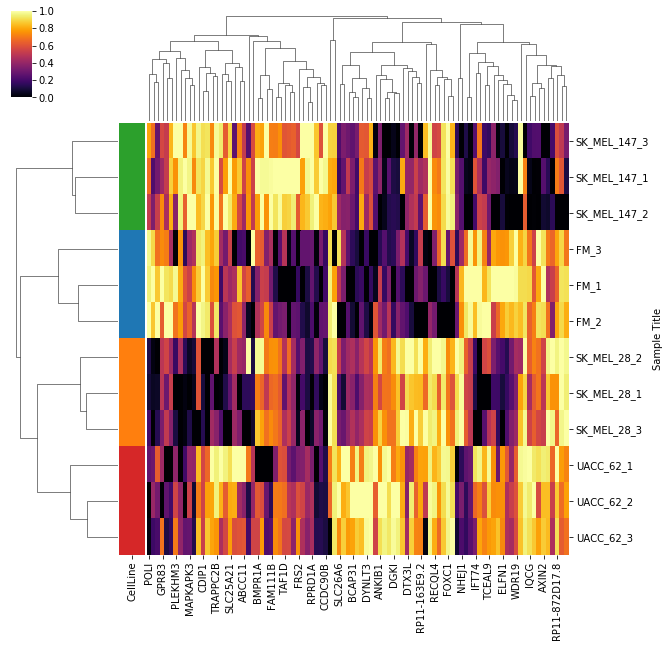

In [13]:
g = sns.clustermap(dfT.loc[:,'ANKIB1':],standard_scale=1, row_colors=row_colors,cmap = 'inferno')

### <font color=brown>Hands on practice</font>

Let's generate a clustermap with a set of differentially expressed genes (based on t-test).

In [15]:
# Pull out normal and metastatic samples from dfT
normal = None
metastatic = None

#print(normal.head(),metastatic.head())

                 ANKIB1     ZNF618     IMPG2    SLC26A6   MAPKAPK3    DYNLT3  \
Sample Title                                                                   
FM_1          11.332037  10.540128  3.700440  10.112440  10.664447  8.459432   
FM_2          11.247928  10.492855  3.169925   9.575539  10.799282  8.915879   
FM_3          11.013323  10.088788  3.906891  10.558421  10.487840  9.152285   

                GRAMD3       MPDZ      DGKI       RCC2    ...      \
Sample Title                                              ...       
FM_1          8.455327  12.458663  5.129283  12.693051    ...       
FM_2          8.668885  12.259155  6.022368  12.809768    ...       
FM_3          8.797662  11.452756  5.930737  12.758640    ...       

              RP11-872D17.8     CC2D1A  RP11-146B14.1     GPR83    SCAMP5  \
Sample Title                                                                
FM_1               3.584963  10.602699       6.209453  4.321928  7.066089   
FM_2               4.1

In [20]:
# let's test the significance of the difference in means with a t-test 
None

[2.21947143e-01 6.59127346e-01 6.93357957e-01 9.12349018e-01
 8.30322419e-01 2.44405579e-03 6.83876063e-02 4.51052642e-03
 6.21257004e-02 1.34901834e-02 2.28818450e-01 5.96516466e-01
 3.68206969e-01 9.80690092e-01 8.85205826e-01 9.65765704e-01
 2.53923299e-02 2.56274417e-04 5.37115787e-01 1.03216252e-01
 2.83610065e-01 2.13584826e-03 4.56573648e-02 1.51868165e-02
 1.96198779e-01 4.32713976e-01 1.00358145e-01 1.54085363e-03
 2.58643097e-02 9.15281365e-04 2.39951137e-01 2.06620780e-02
 4.64592692e-06 5.64705695e-02 3.16276053e-01 1.50599890e-01
 1.29334332e-01 1.34209233e-04 2.81404477e-02 3.42649166e-02
 9.79521405e-01 2.38203602e-03 4.34414053e-04 5.14516193e-04
 2.77037838e-03 6.70914825e-01 3.63484918e-01 2.51901266e-01
 4.43773105e-02 1.29413948e-02 1.38364972e-01 1.66904250e-01
 2.22711598e-01 9.56453608e-01 3.96522909e-04 6.10066245e-02
 3.41217649e-01 5.88663235e-01 7.77160260e-01 5.57821410e-01
 4.12147518e-01 3.70993351e-01 6.44274696e-04 3.68456627e-07
 3.25127787e-01 1.437786

In [22]:
# Now we want to order the gene names by the p value.
geneNames = normal.columns

# find the set of indices that will yield a sorted p value array.
pix = np.argsort(p)

# index the geneNames array by pix to get the sorted gene names.
genesSorted = geneNames[pix]
print(genesSorted)

Index(['MAGEA12', 'FOXC1', 'RECQL4', 'MARCKSL1', 'LMNB1', 'SLC18B1', 'ETF1',
       'MOB3A', 'EHF', 'KPNA4', 'SCAMP5', 'MTSS1', 'GID4', 'CHRNA7', 'WDR19',
       'ZNF24', 'DYNLT3', 'GTF2E1', 'LUM', 'POLI', 'MSTO2P', 'MPDZ', 'TSSK6',
       'RCC2', 'BCAP31', 'IFT74', 'ELFN1', 'DYNC2H1', 'DTX3L', 'COQ3', 'MANF',
       'CPAMD8', 'HNRNPD', 'GPR83', 'CSRNP3', 'TAF1D', 'CDIP1', 'AXIN2',
       'DGKI', 'CC2D1A', 'GRAMD3', 'RPL23AP97', 'TSNAXIP1', 'NCMAP', 'ZNF343',
       'ACAT1', 'FRS2', 'RP11-163E9.2', 'SHMT1', 'PTPN9', 'RPS6KA6', 'ANKIB1',
       'NUTM2A', 'NOMO1', 'KIF5A', 'ZCCHC17', 'TCEAL9', 'CTD-3214H19.4', 'MRO',
       'BMS1P7', 'BMPR1A', 'SULT1A1', 'RPL13AP6', 'UQCR11', 'IQCG', 'TMEM126B',
       'RPRD1A', 'SLC25A21', 'GPR75-ASB3', 'NHEJ1', 'SSH1', 'PGBD2', 'CHRNB1',
       'FAM111B', 'TRAPPC2B', 'C1QTNF9B-AS1', 'CCDC90B', 'FKBPL', 'GTF2H1',
       'RP11-146B14.1', 'ZNF618', 'PLEKHM3', 'IMPG2', 'ABCC11', 'TRMT1L',
       'MAPKAPK3', 'RP11-872D17.8', 'SLC35A3', 'SLC26A6', 'OAZ3', 'T

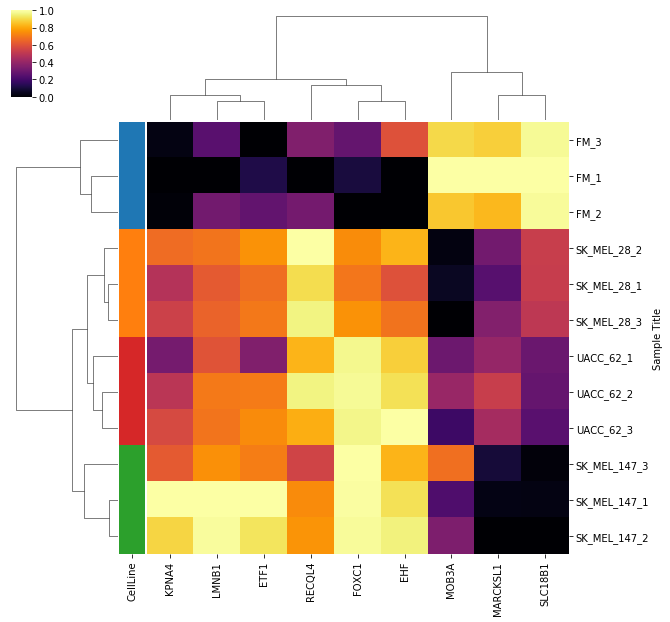

In [23]:
# Now let's plot a clustermap that only shows the top 10 differentially expressed genes.
None